In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import train_test_split
from collections import Counter
import nltk
from nltk.corpus import stopwords
import glob
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import operator
import gensim
from gensim import corpora
import string
from nltk.stem.wordnet import WordNetLemmatizer

csv_directory = "C:/Users/danil/Documents/GitHub/Lantern_v2-master/Lantern_v2-master/Danny's Files/Train_Dummy.csv"

file_directory = 'C:/Users/danil/Documents/GitHub/Lantern_v2-master/Lantern_v2-master/Data'
file_folders = ['/bully_data','/drug_data','/fight_assault_data','/SH_data','/vandalism_data']
file = '/a_teacher_focused_approach.txt'

# file_1 = open(file_directory+file_folders[0]+file,'r',encoding = 'UTF-8') 
# file_2 = file_1.read()

# for type_violence in violence_dict:
#     for paper in violence_dict[type_violence]:
#         words_1 = paper.lower().split()
#         filtered_words = [word for word in words_1 if word not in stopwords.words('english')]
#         wordcount = Counter(filtered_words)
#         print(type_violence, wordcount.most_common(3))

train_set = pd.read_csv(csv_directory, encoding = 'latin-1')
train_set.head()

C:\Users\danil\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


,Input,Bully,Drug,SH
0,Slurred speech,1,3,1
1,Poor academic performance,2,2,1
2,Hangover,1,3,1
3,Blood shot eyes,1,3,1
4,Pupil dialation,1,3,1


In [6]:
def insert_to_dict(aDict,name, text_1):
    if not name in aDict:
        aDict[name] = [(" "+text_1)]
    else:
        aDict[name].append(" " + text_1)

violence_dict = {'Bully_Data':[],'Drug_Data':[],'SH_Data':[]}
keys = ['Bully_Data','Drug_Data','SH_Data']
# violence_dict = {key: None for key in keys}

for i in keys:
    place = keys.index(i)
    all_files = glob.glob(file_directory+file_folders[place]+"/*.txt")
    for file in (all_files):
        current_file = open(file,'r',encoding = 'latin-1').read()
        insert_to_dict(violence_dict, i, current_file)


In [7]:
violence_dict.keys()

dict_keys(['Bully_Data', 'Drug_Data', 'SH_Data'])

In [9]:
#Remove common words and tokenize
stoplist = set('for a of the and to in'.split())

for type_violence in violence_dict:
    i = 0
    try:
        for paper in violence_dict[type_violence]:
            words_1 = paper.lower().split()
            filtered_words = [word for word in words_1 if word not in stopwords.words('english')]
            violence_dict[type_violence][i] = filtered_words
            i += 1
    except:
        pass

In [10]:
#Create corpus (words to specific ID) for each violence
corpus_dict = {}

for type_violence in violence_dict:
    corpus_dict[type_violence] = corpora.Dictionary(violence_dict[type_violence])

In [11]:
corpus_dict['Bully_Data'].token2id

{'camera.': 10514,
 'approach.': 4613,
 'charter': 456,
 'victimized,': 3546,
 'levin': 1188,
 'document.': 5689,
 'witness': 3580,
 'expected,given': 9403,
 'creased': 583,
 'per-': 1410,
 'inform': 2853,
 'excludes': 11393,
 'traced': 1975,
 'nisai': 8250,
 '<www.media-awareness.ca/english/special_initiatives/surveys/index.cfm>': 11222,
 'interrater': 9595,
 'assessment': 293,
 '45-57).': 5511,
 '1963.': 6235,
 "olweus'": 5905,
 'events.': 809,
 'tige': 3465,
 'come.': 7596,
 'â\x80\x98an': 11764,
 'september': 1732,
 '22(5),': 11170,
 'account.': 11236,
 'theory,': 1926,
 '6.17,': 4479,
 'better': 375,
 'likely': 1195,
 'physical': 1430,
 '__': 9106,
 '2000;': 6252,
 'encouraged': 774,
 'complete': 513,
 'hiding': 4846,
 'wentzel,': 7016,
 'addition,': 201,
 'parentâ\x80\x93child': 8320,
 'weapon.': 6159,
 'students.4,31': 1850,
 'ru-': 3285,
 'four-dimensional': 7853,
 'bully-': 2486,
 'structures': 8613,
 'referred': 5131,
 '(deliberately': 7131,
 '(403)': 4150,
 'contention': 377

In [12]:
#Dictionary to BOW for each violence
bow_dict = {}
for type_violence in violence_dict:
    bow_dict[type_violence] = [corpus_dict[type_violence].doc2bow(text) for text in violence_dict[type_violence]]

In [13]:
#TD-IDF model for each type of violence based on specific BOW
from gensim import corpora, models, similarities

tfidf_dict = {}
for type_violence in violence_dict:
    tfidf_dict[type_violence] = models.TfidfModel(bow_dict[type_violence]) # step 1 -- initialize a model

In [14]:
tfidf_dict

{'Bully_Data': <gensim.models.tfidfmodel.TfidfModel at 0x1f66d43a9b0>,
 'Drug_Data': <gensim.models.tfidfmodel.TfidfModel at 0x1f66ecd5cf8>,
 'SH_Data': <gensim.models.tfidfmodel.TfidfModel at 0x1f66d43aa90>}

In [15]:
#Sample input from Latern
lantern_input = "bullies bullies bully"
lantern_vec = {}
for type_violence in violence_dict:
    lantern_vec[type_violence] = corpus_dict[type_violence].doc2bow(lantern_input.lower().split())
print(lantern_vec)

{'Bully_Data': [(404, 2), (406, 1)], 'Drug_Data': [(6086, 2), (6092, 1)], 'SH_Data': [(4081, 1), (6894, 2)]}


In [16]:
#Apply Lantern_vec to each TF-IDF model
for type_violence in violence_dict:
    print(type_violence, list(tfidf_dict[type_violence][lantern_vec[type_violence]]))

Bully_Data []
Drug_Data [(6086, 0.8476305453068145), (6092, 0.5305869001990838)]
SH_Data [(4081, 0.32991728257822744), (6894, 0.9440098445758911)]


In [32]:
def tfidf_model(word):
    word_new = word.lower().split()
    violence_vec = {}
    tfidf_score_vec = {}
    
    #Apply TF-IDF Model for each word
    for type_violence in violence_dict:
        violence_vec[type_violence] = corpus_dict[type_violence].doc2bow(word.lower().split())
        tfidf_score_vec[type_violence] = tfidf_dict[type_violence][violence_vec[type_violence]]
        
    #Compute high, low, average TF-IDF, count 
    
    return tfidf_score_vec

    #Apply TF-IDF model for each word
    
    
    
    
    
    
#     for j in range(len(word_new)):
#         current_word = word_new[j]
#         for key in violence_dict:
#             for i in range(len(violence_dict[key])):
#                 if key == 'Drug_Data':
#                     tfidf_drug += wordcount[current_word]
#                 if key == 'Bully_Data':
#                     tfidf_bully += wordcount[current_word]    
#                 if key == 'SH_Data':
#                     tfidf_SH += wordcount[current_word]  
                    
#     return tfidf_drug, tfidf_bully, tfidf_SH

In [45]:
tfidf_model('guns bully bullies school teacher')['Drug_Data']

[(1240, 0.047023588156957195),
 (6086, 0.5288686190315601),
 (6092, 0.6621062979342109),
 (7374, 0.5288686190315601)]

In [48]:
#Functions
def word_count(word):
    
    word_new = word.lower().split()
    word_bully = 0
    word_drug = 0
    word_SH = 0
    
    doc_bully = 0
    doc_drug = 0
    doc_SH = 0
    
    #Count words
    for j in range(len(word_new)):
        current_word = word_new[j]
        for key in violence_dict:
            for i in range(len(violence_dict[key])):
                if key == 'Drug_Data':
                    current_file = violence_dict[key][i].lower().split()
                    wordcount = Counter(current_file)
                    word_drug += wordcount[current_word]
                if key == 'Bully_Data':
                    current_file = violence_dict[key][i].lower().split()
                    wordcount = Counter(current_file)
                    word_bully += wordcount[current_word]    
                if key == 'SH_Data':
                    current_file = violence_dict[key][i].lower().split()
                    wordcount = Counter(current_file)
                    word_SH += wordcount[current_word]  
        
                    
    #Count docs with words
    for j in range(len(word_new)):
        current_word = word_new[j]
        for key in violence_dict:
            for i in range(len(violence_dict[key])):
                if key == 'Drug_Data':
                    current_file = violence_dict[key][i].lower().split()
                    wordcount = Counter(current_file)
                    if wordcount[current_word] > 0:
                        doc_drug += 1
                if key == 'Bully_Data':
                    current_file = violence_dict[key][i].lower().split()
                    wordcount = Counter(current_file)
                    if wordcount[current_word] > 0:
                        doc_bully += 1 
                if key == 'SH_Data':
                    current_file = violence_dict[key][i].lower().split()
                    wordcount = Counter(current_file)
                    if wordcount[current_word] > 0:
                        doc_SH += 1
    
    return word_drug, word_bully, word_SH, doc_drug, doc_bully, doc_SH

word_count('Drugs')

(147, 1, 7, 13, 1, 3)

In [49]:
cols = ['word_drug','word_bully','word_SH','doc_drug','doc_bully','doc_SH']
feature_list = []
for i in range(train_set.shape[0]):
    feature_list.append((word_count(train_set['Input'][i])))
feature_df = pd.DataFrame(np.array(feature_list).reshape(train_set.shape[0],len(cols)), columns = cols)
feature_df.head()

,word_drug,word_bully,word_SH,doc_drug,doc_bully,doc_SH
0,1,2,0,1,1,0
1,73,59,24,18,17,14
2,0,0,0,0,0,0
3,4,2,9,3,2,5
4,0,0,3,0,0,1


In [50]:
feature_df.tail(10)

,word_drug,word_bully,word_SH,doc_drug,doc_bully,doc_SH
82,150,108,28,20,17,8
83,0,0,0,0,0,0
84,294,11,32,13,5,7
85,167,134,56,23,16,13
86,3690,3171,2205,33,36,25
87,3746,3097,2166,33,28,25
88,147,1,7,13,1,3
89,66,19,96,13,9,11
90,2062,1649,1145,28,26,18
91,1836,1549,1083,18,16,13


In [51]:
feature_df = feature_df.loc[~(feature_df==0).all(axis=1)]
feature_df.head()

,word_drug,word_bully,word_SH,doc_drug,doc_bully,doc_SH
0,1,2,0,1,1,0
1,73,59,24,18,17,14
3,4,2,9,3,2,5
4,0,0,3,0,0,1
5,2342,1755,952,23,13,14


In [52]:
final_df = pd.concat([feature_df, train_set], axis=1)
final_df

,word_drug,word_bully,word_SH,doc_drug,doc_bully,doc_SH,Input,Bully,Drug,SH
0,1.0,2.0,0.0,1.0,1.0,0.0,Slurred speech,1,3,1
1,73.0,59.0,24.0,18.0,17.0,14.0,Poor academic performance,2,2,1
2,NaN,NaN,NaN,NaN,NaN,NaN,Hangover,1,3,1
3,4.0,2.0,9.0,3.0,2.0,5.0,Blood shot eyes,1,3,1
4,0.0,0.0,3.0,0.0,0.0,1.0,Pupil dialation,1,3,1
5,2342.0,1755.0,952.0,23.0,13.0,14.0,Changes in eating habits,2,2,2
6,3.0,0.0,3.0,2.0,0.0,1.0,Impaired coordination,1,3,1
7,NaN,NaN,NaN,NaN,NaN,NaN,Tremors,1,3,1
8,778.0,126.0,320.0,41.0,28.0,25.0,High risk behaviors,3,3,3
9,804.0,455.0,347.0,17.0,17.0,14.0,Poor school attendance,3,3,3


In [53]:
final_df = final_df.drop(['Input'], axis = 1)
final_df = final_df.dropna()
final_df.tail()

,word_drug,word_bully,word_SH,doc_drug,doc_bully,doc_SH,Bully,Drug,SH
87,3746.0,3097.0,2166.0,33.0,28.0,25.0,2,1,3
88,147.0,1.0,7.0,13.0,1.0,3.0,1,3,1
89,66.0,19.0,96.0,13.0,9.0,11.0,3,1,3
90,2062.0,1649.0,1145.0,28.0,26.0,18.0,3,1,2
91,1836.0,1549.0,1083.0,18.0,16.0,13.0,3,1,2


In [54]:
final_df = final_df.values
np.random.shuffle(final_df) # shuffle each row in-place, but preserve the row

X = final_df[:,:6]
Y = final_df[:,-3]

# last 100 rows will be test
Xtrain = X[:-20,]
Ytrain = Y[:-20,]
Xtest = X[-20:,]
Ytest = Y[-20:,]

In [40]:
# def warn(*args, **kwargs): pass
# import warnings
# warnings.warn = warn

# from sklearn.preprocessing import LabelEncoder
# from sklearn.cross_validation import StratifiedShuffleSplit

# sss = StratifiedShuffleSplit(labels, 10, test_size=0.2, random_state=23)

# for train_index, test_index in sss:
#     X_train, X_test = train.values[train_index], train.values[test_index]
#     y_train, y_test = labels[train_index], labels[test_index]

In [55]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(Xtrain, Ytrain)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(Xtest)
    acc = accuracy_score(Ytest, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(Xtest)
    ll = log_loss(Ytest, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)
print(train_predictions)

KNeighborsClassifier
****Results****
Accuracy: 40.0000%
Log Loss: 4.1392074198801625
SVC
****Results****
Accuracy: 50.0000%
Log Loss: 1.0701728033305167
NuSVC
****Results****
Accuracy: 45.0000%
Log Loss: 1.0889961850856906
DecisionTreeClassifier
****Results****
Accuracy: 40.0000%
Log Loss: 20.72326583694641
RandomForestClassifier
****Results****
Accuracy: 55.0000%
Log Loss: 5.894631576576382
AdaBoostClassifier
****Results****
Accuracy: 40.0000%
Log Loss: 1.1112865405620735
GradientBoostingClassifier
****Results****
Accuracy: 55.0000%
Log Loss: 1.7143995443067623
GaussianNB
****Results****
Accuracy: 20.0000%
Log Loss: 1.873821898400458
LinearDiscriminantAnalysis
****Results****
Accuracy: 45.0000%
Log Loss: 1.1097870939455516
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 55.0000%
Log Loss: 5.341011715536061
[[  5.94805803e-050   1.29524595e-004   9.99870475e-001]
 [  6.19207974e-032   1.00000000e+000   3.29782941e-013]
 [  8.68340515e-001   1.10649141e-002   1.20594571e-001]
 [

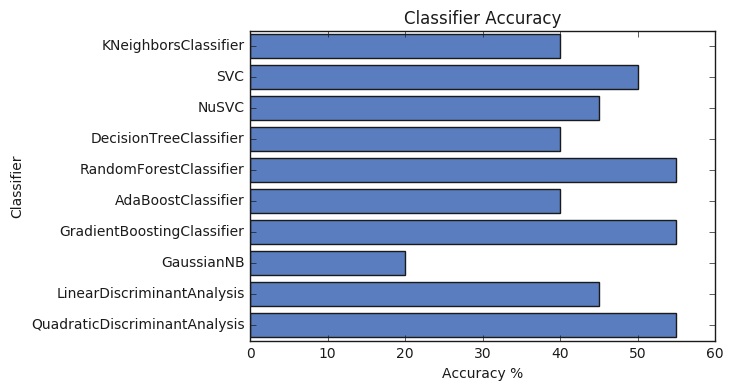

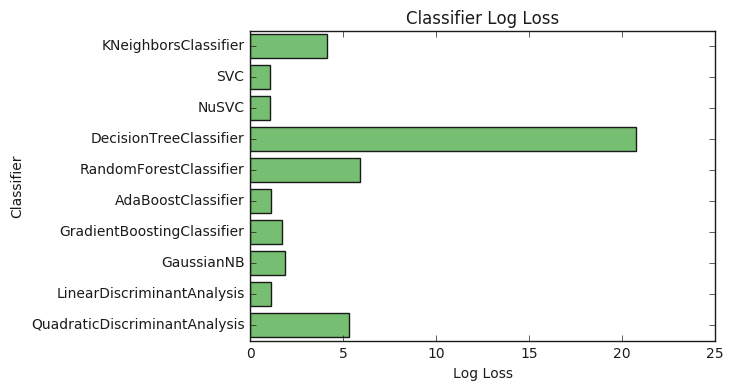

In [56]:
import seaborn as sns
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [158]:
current_file = violence_dict['SH_Data'][0].lower().split()
wordcount = Counter(current_file)
wordcount['harass']

0

In [138]:
len(violence_dict['Drug_Data'])

15

In [37]:

file_3 = violence_dict['SH_Data'][0].lower().split()
wordcount = Counter(file_3)
print(wordcount['sexual'])

wordnet_lemmatizer = WordNetLemmatizer()
def my_tokenizer(s):
    s = s.lower() # downcase
    tokens = nltk.tokenize.word_tokenize(s) # split string into words (tokens)
    tokens = [t for t in tokens if t not in stopwords.words('english')] # remove stopwords
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    return tokens

x = my_tokenizer(violence_dict['SH_Data'][1])
wordcount = Counter(x)
wordcount.most_common()

[('youth', 74),
 ('violence', 44),
 ('assault-injured', 39),
 ('injury', 36),
 ('group', 36),
 ('fight', 28),
 ('care', 26),
 ('study', 22),
 ('visit', 21),
 ('likely', 18),
 ('comparison', 17),
 ('health', 17),
 ('reported', 16),
 ('use', 16),
 ('assault-related', 15),
 ('year', 15),
 ('substance', 14),
 ('time', 13),
 ('higher', 13),
 ('patient', 13),
 ('past', 12),
 ('assault', 12),
 ('previous', 12),
 ('seeking', 12),
 ('data', 12),
 ('intervention', 11),
 ('age', 11),
 ('reason', 11),
 ('weapon', 11),
 ('sample', 11),
 ('analysis', 10),
 ('among', 10),
 ('mental', 9),
 ('may', 9),
 ('using', 9),
 ('presenting', 9),
 ('high', 8),
 ('characteristic', 8),
 ('alcohol', 8),
 ('misuse', 8),
 ('acute', 8),
 ('survey', 8),
 ('partner', 8),
 ('child', 7),
 ('violent', 7),
 ('report', 7),
 ('urban', 7),
 ('nê=', 7),
 ('involved', 7),
 ('odds', 7),
 ('table', 7),
 ('gender', 7),
 ('risk', 7),
 ('service', 6),
 ('future', 6),
 ('ed-based', 6),
 ('medical', 6),
 ('rate', 6),
 ('participant', 6